# Root Finding of Scalar Equations
This notebook covers algorithms to find the root of scalar equations. The objective is to find $x$ where $f(x) = 0$. The plot below shows an example function: $3x^2+5$.

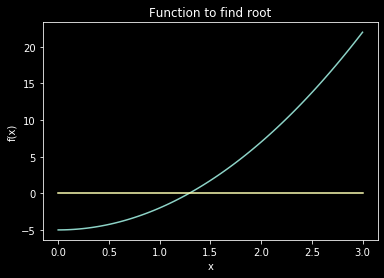

In [66]:
import numpy as np

# define the function to find the roots of
def f(x): return 3*x**2 - 5
# define the analytical derivative of our function (this is needed for the Newton-Raphson Method)
def df(x): return 6*x


x = np.linspace(0, 3, num=100)

import matplotlib.pyplot as plt
plt.plot(x, f(x), x, np.zeros_like(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function to find root")
plt.show()


## Newton-Raphson Method
Beginning with some current approximation, $x_i$, we can approximate a new value $f(x_{i+1})$ using the Taylor series
$$f(x_{i+1}-x_i) = f(x_i) + f'(x_i) (x_{i+1}-x_i) + f''(x_i) \frac{(x_{i+1}-x_i)^2}{2!} + f'''(x_i) \frac{(x_{i+1}-x_i)^3}{3!} + \cdots$$
and after truncating the series we get
$$f(x_{i+1}-x_i) = f(x_i) + f'(x_i) (x_{i+1}-x_i)$$
and if we want the new value $f(x_{i+1})$ to be the root so that $f(x_{i+1})=0$ we can substitute this in and get
$$ 0 = f(x_i) + f'(x_i) (x_{i+1}-x_i)$$
which we can re-raange to solve for our new root, $x_{i+1}$
$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$
which we can apply this formula in an iterative manner continuously making our approximation to the root more accurate until we meet some error tolerances such as residual, $R$, and iterative convergence, $C$
$$ R = |f(x_{i+1})| < \delta $$
$$ C = |x_{i+1}-x_i| < \sigma $$
where $\delta$ and $\sigma$ are some small tolerances. A gif of this process is shown below with the Python code below that.

![SegmentLocal](NewtonIteration.gif "segment")

In [67]:
def newtonRaphson(f, df, guess, conv_tol = 1e-5, res_tol = 1e-5, max_iters = 1e3, verbose=False):
    x_new = guess
    n = 0
    res = np.abs(f(x_new))
    conv = conv_tol + 1.
    if verbose:
        print("iter     x_i+1       |f(x)|          |x_i+1 - x_i|")
        print("=================================================")
        print("{:3d}      {:f}    {:e}    {:e}".format(n, x_new, res, conv))
    while n < max_iters:
        x_old = x_new
        fval = f(x_old)
        dfval = df(x_old)
        if np.isnan(dfval):
            print('!!! FAILED. Derivative is NaN. Please adjust the initial guess.')
            break
        if np.abs(dfval) <= np.finfo(float).eps:
            print('!!! FAILED. Derivative is 0. Please adjust the initial guess.')
            break
        x_new = x_old - fval / dfval
        conv = np.abs(x_new-x_old)
        res = np.abs(f(x_new))
        n += 1
        if verbose:
            print("{:3d}      {:f}    {:e}    {:e}".format(n, x_new, res, conv))
        if res <= res_tol and conv <= conv_tol:
            break
    
    return x_new, res, conv, n
    
x, res, conv, num_iters = newtonRaphson(f, df, 1.5, verbose=True)


iter     x_i+1       |f(x)|          |x_i+1 - x_i|
  0      1.500000    1.750000e+00    1.000010e+00
  1      1.305556    1.134259e-01    1.944444e-01
  2      1.291076    6.290030e-04    1.447991e-02
  3      1.290994    1.977975e-08    8.119883e-05
  4      1.290994    0.000000e+00    2.553555e-09


Great! Our code was able to find the root within a tolerance in 3 iterations. Newton's method works very well most fo the time, but it is not without fail. I want to highlight a few cases where Newton Raphson fails.

1. infinitely oscillating between values
2. encountering a stationary point - divide by 0 error
3. poor initial condition that shoots into no mans land
   
To demonstrate scenario 1, we can try to find the root of $f(x)=x^3-2x+2$ with an initial guess of 0.

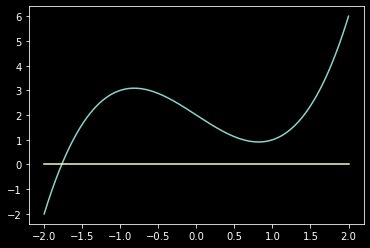

In [68]:
def f(x): return x**3 - 2*x + 2
def df(x): return 3*x**2 - 2

x = np.linspace(-2,2,num=1000)
plt.plot(x, f(x), x, np.zeros_like(x))
plt.show()


In [69]:
x, res, conv, num_iters = newtonRaphson(f, df, 0, max_iters=10, verbose=True)

iter     x_i+1       |f(x)|          |x_i+1 - x_i|
  0      0.000000    2.000000e+00    1.000010e+00
  1      1.000000    1.000000e+00    1.000000e+00
  2      0.000000    2.000000e+00    1.000000e+00
  3      1.000000    1.000000e+00    1.000000e+00
  4      0.000000    2.000000e+00    1.000000e+00
  5      1.000000    1.000000e+00    1.000000e+00
  6      0.000000    2.000000e+00    1.000000e+00
  7      1.000000    1.000000e+00    1.000000e+00
  8      0.000000    2.000000e+00    1.000000e+00
  9      1.000000    1.000000e+00    1.000000e+00
 10      0.000000    2.000000e+00    1.000000e+00


As we can see, the approximation of the root oscillates back and forth between 0 and 1.

Now to demonstarte scenario 2 where we have a divide by 0 error we can simply pick a function such as a parabola, $f(x)=x^2-1$, and set the initial guess where the function's derivative would be 0 which is 0.

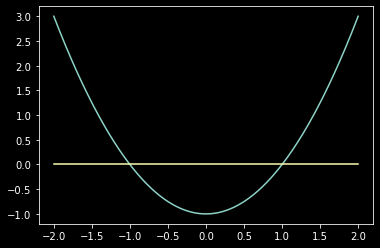

In [70]:
def f(x): return x**2 - 1
def df(x): return 2*x

x = np.linspace(-2,2,num=1000)
plt.plot(x, f(x), x, np.zeros_like(x))
plt.show()

In [71]:
x, res, conv, num_iters = newtonRaphson(f, df, 0, max_iters=10, verbose=True)

iter     x_i+1       |f(x)|          |x_i+1 - x_i|
  0      0.000000    1.000000e+00    1.000010e+00
!!! FAILED. Derivative is 0. Please adjust the initial guess.


Lastly, if we have an asymtotic function on one side such as $f(x)=\frac{2}{\sqrt{x}}\log{\frac{r}{3.7}+\frac{2.51}{\mathrm{Re}\sqrt{x}}}$, which is the Colebrook equation for finding the friction factor in a pipe, then the tangent line might take you where the function is undefined giving a Not a Number (NaN) error.

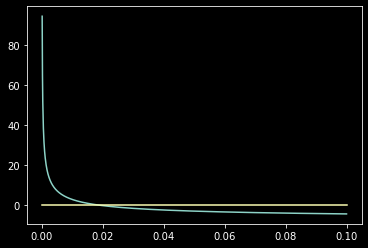

In [72]:
Re = 1.8182e5
r = 5e-4
def f(x): return x**(-0.5) + 2*np.log10(r/3.7 + 2.51/(Re*x**(0.5)))
def df(x): return -0.5*x**(-1.5) + (2.51/(Re*x**(0.5)))*x**(-1.5)

x = np.linspace(0.0001,0.1,num=1000)
plt.plot(x, f(x), x, np.zeros_like(x))
plt.show()

In [73]:
x, res, conv, num_iters = newtonRaphson(f, df, 0.1, max_iters=10, verbose=True)

iter     x_i+1       |f(x)|          |x_i+1 - x_i|
  0      0.100000    4.333036e+00    1.000010e+00
  1      -0.174069    nan    2.740692e-01
!!! FAILED. Derivative is NaN. Please adjust the initial guess.
<ipython-input-72-c3527f9cf0b5>:3: RuntimeWarning: invalid value encountered in double_scalars
  def f(x): return x**(-0.5) + 2*np.log10(r/3.7 + 2.51/(Re*x**(0.5)))
<ipython-input-72-c3527f9cf0b5>:4: RuntimeWarning: invalid value encountered in double_scalars
  def df(x): return -0.5*x**(-1.5) + (2.51/(Re*x**(0.5)))*x**(-1.5)


For this function, if we choose too high of a guess where the function becomes flat we shoot into the undefined region of the function and Newton-Raphson fails. If we choose a better guess, the method works as seen below.

In [74]:
x, res, conv, num_iters = newtonRaphson(f, df, 0.03, max_iters=10, verbose=True)

iter     x_i+1       |f(x)|          |x_i+1 - x_i|
  0      0.030000    1.562277e+00    1.000010e+00
  1      0.013762    1.329985e+00    1.623825e-02
  2      0.018057    1.944549e-01    4.295263e-03
  3      0.019001    2.220372e-03    9.438589e-04
  4      0.018989    1.146891e-04    1.163331e-05
  5      0.018990    5.865444e-06    6.003444e-07
